# Newton's Method

>  In numerical analysis, the Newton–Raphson method, also known simply as Newton's method, named after Isaac Newton and Joseph Raphson, is a root-finding algorithm which produces successively better approximations to the roots (or zeroes) of a real-valued function. 

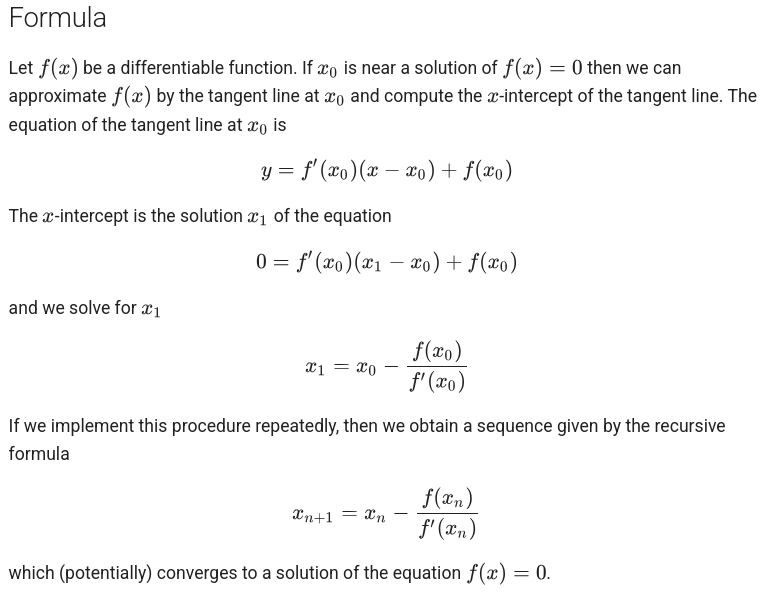

In [14]:
## Init
import numpy as np
import matplotlib.pyplot as plt

## Implementation

In [4]:
class NewtonSqrtResult:
    def __init__(self, estimated_root, iterations, x_values, f_values):
        self.estimated_root = estimated_root  # The estimated square root
        self.iterations = iterations  # Number of iterations taken
        self.x_values = x_values  # List of x_n values
        self.f_values = f_values  # List of f(x_n) values

In [7]:
def newton_method(f, f_prime, x0, tolerance=1e-7, max_iterations=100):
    """
    Apply Newton's Method to find the root of a function.

    Parameters:
    f (function): The function for which we are finding the root.
    f_prime (function): The derivative of the function f.
    x0 (float): Initial guess for the root.
    tolerance (float): Tolerance for convergence.
    max_iterations (int): Maximum number of iterations.

    Returns:
    NewtonSqrtResult: An object containing the estimated root and convergence data.
    """
    x_n = x0  # Initial guess
    x_values = [x_n]  # Store x_n values for plotting
    f_values = [f(x_n)]  # Store f(x_n) values for plotting

    for iteration in range(max_iterations):
        f_x_n = f(x_n)  # Compute f(x_n)
        f_prime_x_n = f_prime(x_n)  # Compute f'(x_n)

        if f_prime_x_n == 0:  # Avoid division by zero
            raise ValueError("Derivative is zero. No solution found.")

        # Update the guess using Newton's formula
        x_n1 = x_n - f_x_n / f_prime_x_n

        # Store values for plotting
        x_values.append(x_n1)
        f_values.append(f(x_n1))

        # Check for convergence
        if abs(x_n1 - x_n) < tolerance:
            return NewtonSqrtResult(x_n1, iteration + 1, x_values, f_values)

        x_n = x_n1

    raise ValueError("Exceeded maximum iterations. No solution found.")

## Use

In [26]:
S = 25  # Change this to compute square roots of other numbers
X0 = 1

# Define the function and its derivative for sqrt(S)
f = lambda x: x**2 - S  # f(x) = x^2 - S
f_prime = lambda x: 2 * x  # f'(x) = 2x

# Compute the square root using Newton's Method
result = newton_method(f, f_prime, X0)  # Use S as the initial guess
print(f"The estimated square root of {S} is: {result.estimated_root} after {result.iterations} iterations.")

The estimated square root of 25 is: 5.0 after 7 iterations.


## Plot

In [20]:
def plot_convergence(result):
    """
    Plot the convergence of Newton's method in a single graph.

    Parameters:
    result (NewtonSqrtResult): The result object containing convergence data.
    """
    plt.figure(figsize=(10, 6))

    # Create x values for the function plot
    x_plot = np.linspace(min(result.x_values) - 1, max(result.x_values) + 1, 100)
    f_plot = [result.x_values[0]**2 - S for x in x_plot]  # Using the function f(x) = x^2 - S

    # Plot the function f(x)
    plt.plot(x_plot, [x**2 - S for x in x_plot], label='f(x) = x^2 - S', color='blue', alpha=0.5)
    
    # Plot the x_n and f(x_n) values
    plt.plot(result.x_values, result.f_values, marker='o', label='(x_n, f(x_n))', color='orange')

    # Annotate the points
    for i in range(len(result.x_values)):
        plt.annotate(f'({result.x_values[i]:.2f}, {result.f_values[i]:.2f})', 
                     (result.x_values[i], result.f_values[i]), 
                     textcoords="offset points", 
                     xytext=(0,5), 
                     ha='center')

    plt.axhline(y=0, color='red', linestyle='--', label='f(x) = 0')
    plt.axvline(x=np.sqrt(S), color='green', linestyle='--', label='True sqrt(S)')

    plt.title('Convergence of Newton\'s Method')
    plt.xlabel('x_n value')
    plt.ylabel('f(x_n)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

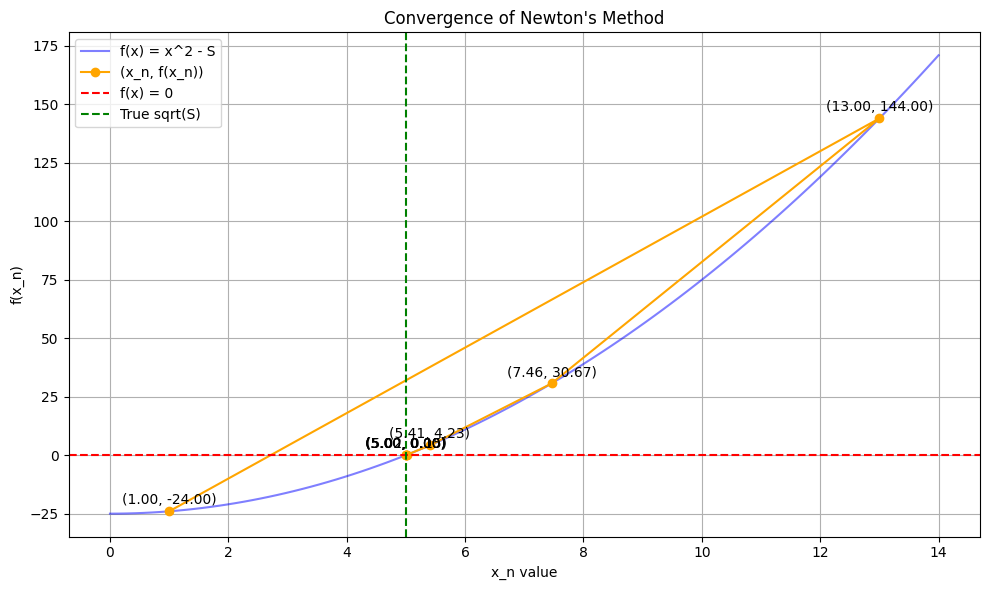

In [25]:
# Plot the convergence
plot_convergence(result)

## References

- [Newton-Raphson Method](https://righteous-guardian-68f.notion.site/Newton-Raphson-Method-19fc0f5171ec80a796d6d42c58ec654b?pvs=4)